In [115]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pd.reset_option("display.max_columns")
# pd.reset_option("display.max_rows")
# pd.reset_option("display.width")
# pd.reset_option("display.max_colwidth")

In [ ]:

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [116]:
"Reload the CSV file after code execution state reset"
financial_files_path = "./data_csv/Financial_*.csv"
all_files = glob.glob(financial_files_path)

In [117]:
df_list = []
for file in all_files:
    temp_df = pd.read_csv(file)
    quarter = file.split("_")[2] + "_" + file.split("_")[3].split(".")[0]
    temp_df["QUARTER"] = quarter
    df_list.append(temp_df)

In [118]:
merged_df = pd.concat(df_list)

In [134]:
# Define useful features for CAMELS-based feature engineering

camel_core_features = [
    # Capital Adequacy
    'EQV', 'EQTOT', 'IDT1RWAJR', 'RBCRWAJ',

    # Asset Quality
    'LNATRESR', 'NTLNLSR', 'NCLNLSR', 'LNLSDEPR', 'LNLSNET',
    'ORE', 'P3ASSET', 'NCRER', 'NCRERESR', 'NTRECOSR','EQCDIVNTINC',

    # Management
    'EINTEXP', 'INTINC', 'NUMEMP',

    # Earnings
    'ROA', 'ROAPTX', 'ROE', 'PTAXNETINC', 'NETINC',
    'NOIJ', 'NONII', 'NIM',

    # Liquidity
    'DEP', 'COREDEP', 'DEPINS', 'DEPUNINS', 'DEPNIDOM',

    # Sensitivity to Market Risk
    'IGLSEC', 'ASDRRES',

    # Total Assets
    'NAASSET'
]

# Optional metadata for grouping, merging, filtering
metadata_fields = [
    'CERT', 'NAMEFULL', 'ZIP', 'STNAME', 'CITY',
    'RSSDID', 'BKCLASS', 'MUTUAL', 'TRUST', 'QUARTER'
]

# Labeling or time metadata
labeling_fields = [
    'INSDATE', 'ESTYMD'
]

# Final full set to keep
columns_to_keep = camel_core_features + metadata_fields + labeling_fields

In [135]:
cleaned_merged_df = merged_df[columns_to_keep]

In [136]:
cleaned_merged_df.describe()

,EQV,EQTOT,IDT1RWAJR,RBCRWAJ,LNATRESR,NTLNLSR,NCLNLSR,LNLSDEPR,LNLSNET,ORE,...,IGLSEC,ASDRRES,NAASSET,CERT,ZIP,RSSDID,MUTUAL,TRUST,INSDATE,ESTYMD
count,123572.000000,1.233010e+05,123572.000000,123572.000000,123572.000000,123572.000000,123572.000000,1.235720e+05,1.235720e+05,1.233010e+05,...,1.233010e+05,1.115980e+05,1.235720e+05,123572.000000,123572.000000,1.235720e+05,123572.000000,123572.000000,1.235720e+05,1.235720e+05
mean,12.456808,1.306563e+05,20.799747,25.391862,1.401141,0.254550,1.143081,1.010582e+03,7.379641e+05,1.430146e+03,...,4.471938e+02,6.655085e+03,7.083879e+03,21393.905537,52543.624478,9.800662e+05,0.066868,0.283721,2.046787e+07,1.938401e+07
std,11.049177,1.991125e+06,118.616902,156.091798,1.341104,2.151341,2.412998,9.008876e+04,1.050111e+07,3.322018e+04,...,2.100930e+04,2.701424e+05,2.081819e+05,16032.855228,23554.147204,9.672343e+05,0.249794,0.450805,8.261582e+06,4.346905e+05
min,-16.065911,-1.311200e+04,-18.955043,-18.955043,0.000000,-440.568696,0.000000,-1.230315e+01,-1.250000e+02,-1.939900e+04,...,-1.463000e+06,0.000000e+00,0.000000e+00,9.000000,0.000000,3.700000e+01,0.000000,0.000000,1.933120e+07,1.784010e+07
25%,8.411170,6.322000e+03,10.987732,12.212456,0.964798,0.000000,0.117672,6.440095e+01,3.219150e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,9.000000e+00,9433.000000,35210.000000,3.283570e+05,0.000000,0.000000,1.934010e+07,1.904020e+07
50%,9.888535,1.249400e+04,13.736420,14.995298,1.224777,0.047241,0.508511,7.996354e+01,7.546400e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,2.510000e+02,17880.000000,55917.000000,6.571780e+05,0.000000,0.000000,1.954050e+07,1.929051e+07
75%,12.431444,2.808400e+04,18.857978,20.266446,1.571552,0.223267,1.302603,9.289045e+01,1.847878e+05,2.710000e+02,...,3.000000e+00,0.000000e+00,1.088000e+03,30337.000000,69001.000000,9.796290e+05,0.000000,1.000000,1.989081e+07,1.984010e+07
max,100.049505,1.798135e+08,22798.245614,26200.000000,100.000000,98.372377,100.000000,2.119370e+07,7.137270e+08,5.794000e+06,...,2.975000e+06,2.698500e+07,3.013552e+07,91385.000000,99901.000000,4.210227e+06,1.000000,1.000000,9.999123e+07,2.010122e+07


In [130]:
print(cleaned_merged_df['EQV'].describe())

count    123572.000000
mean         12.456808
std          11.049177
min         -16.065911
25%           8.411170
50%           9.888535
75%          12.431444
max         100.049505
Name: EQV, dtype: float64


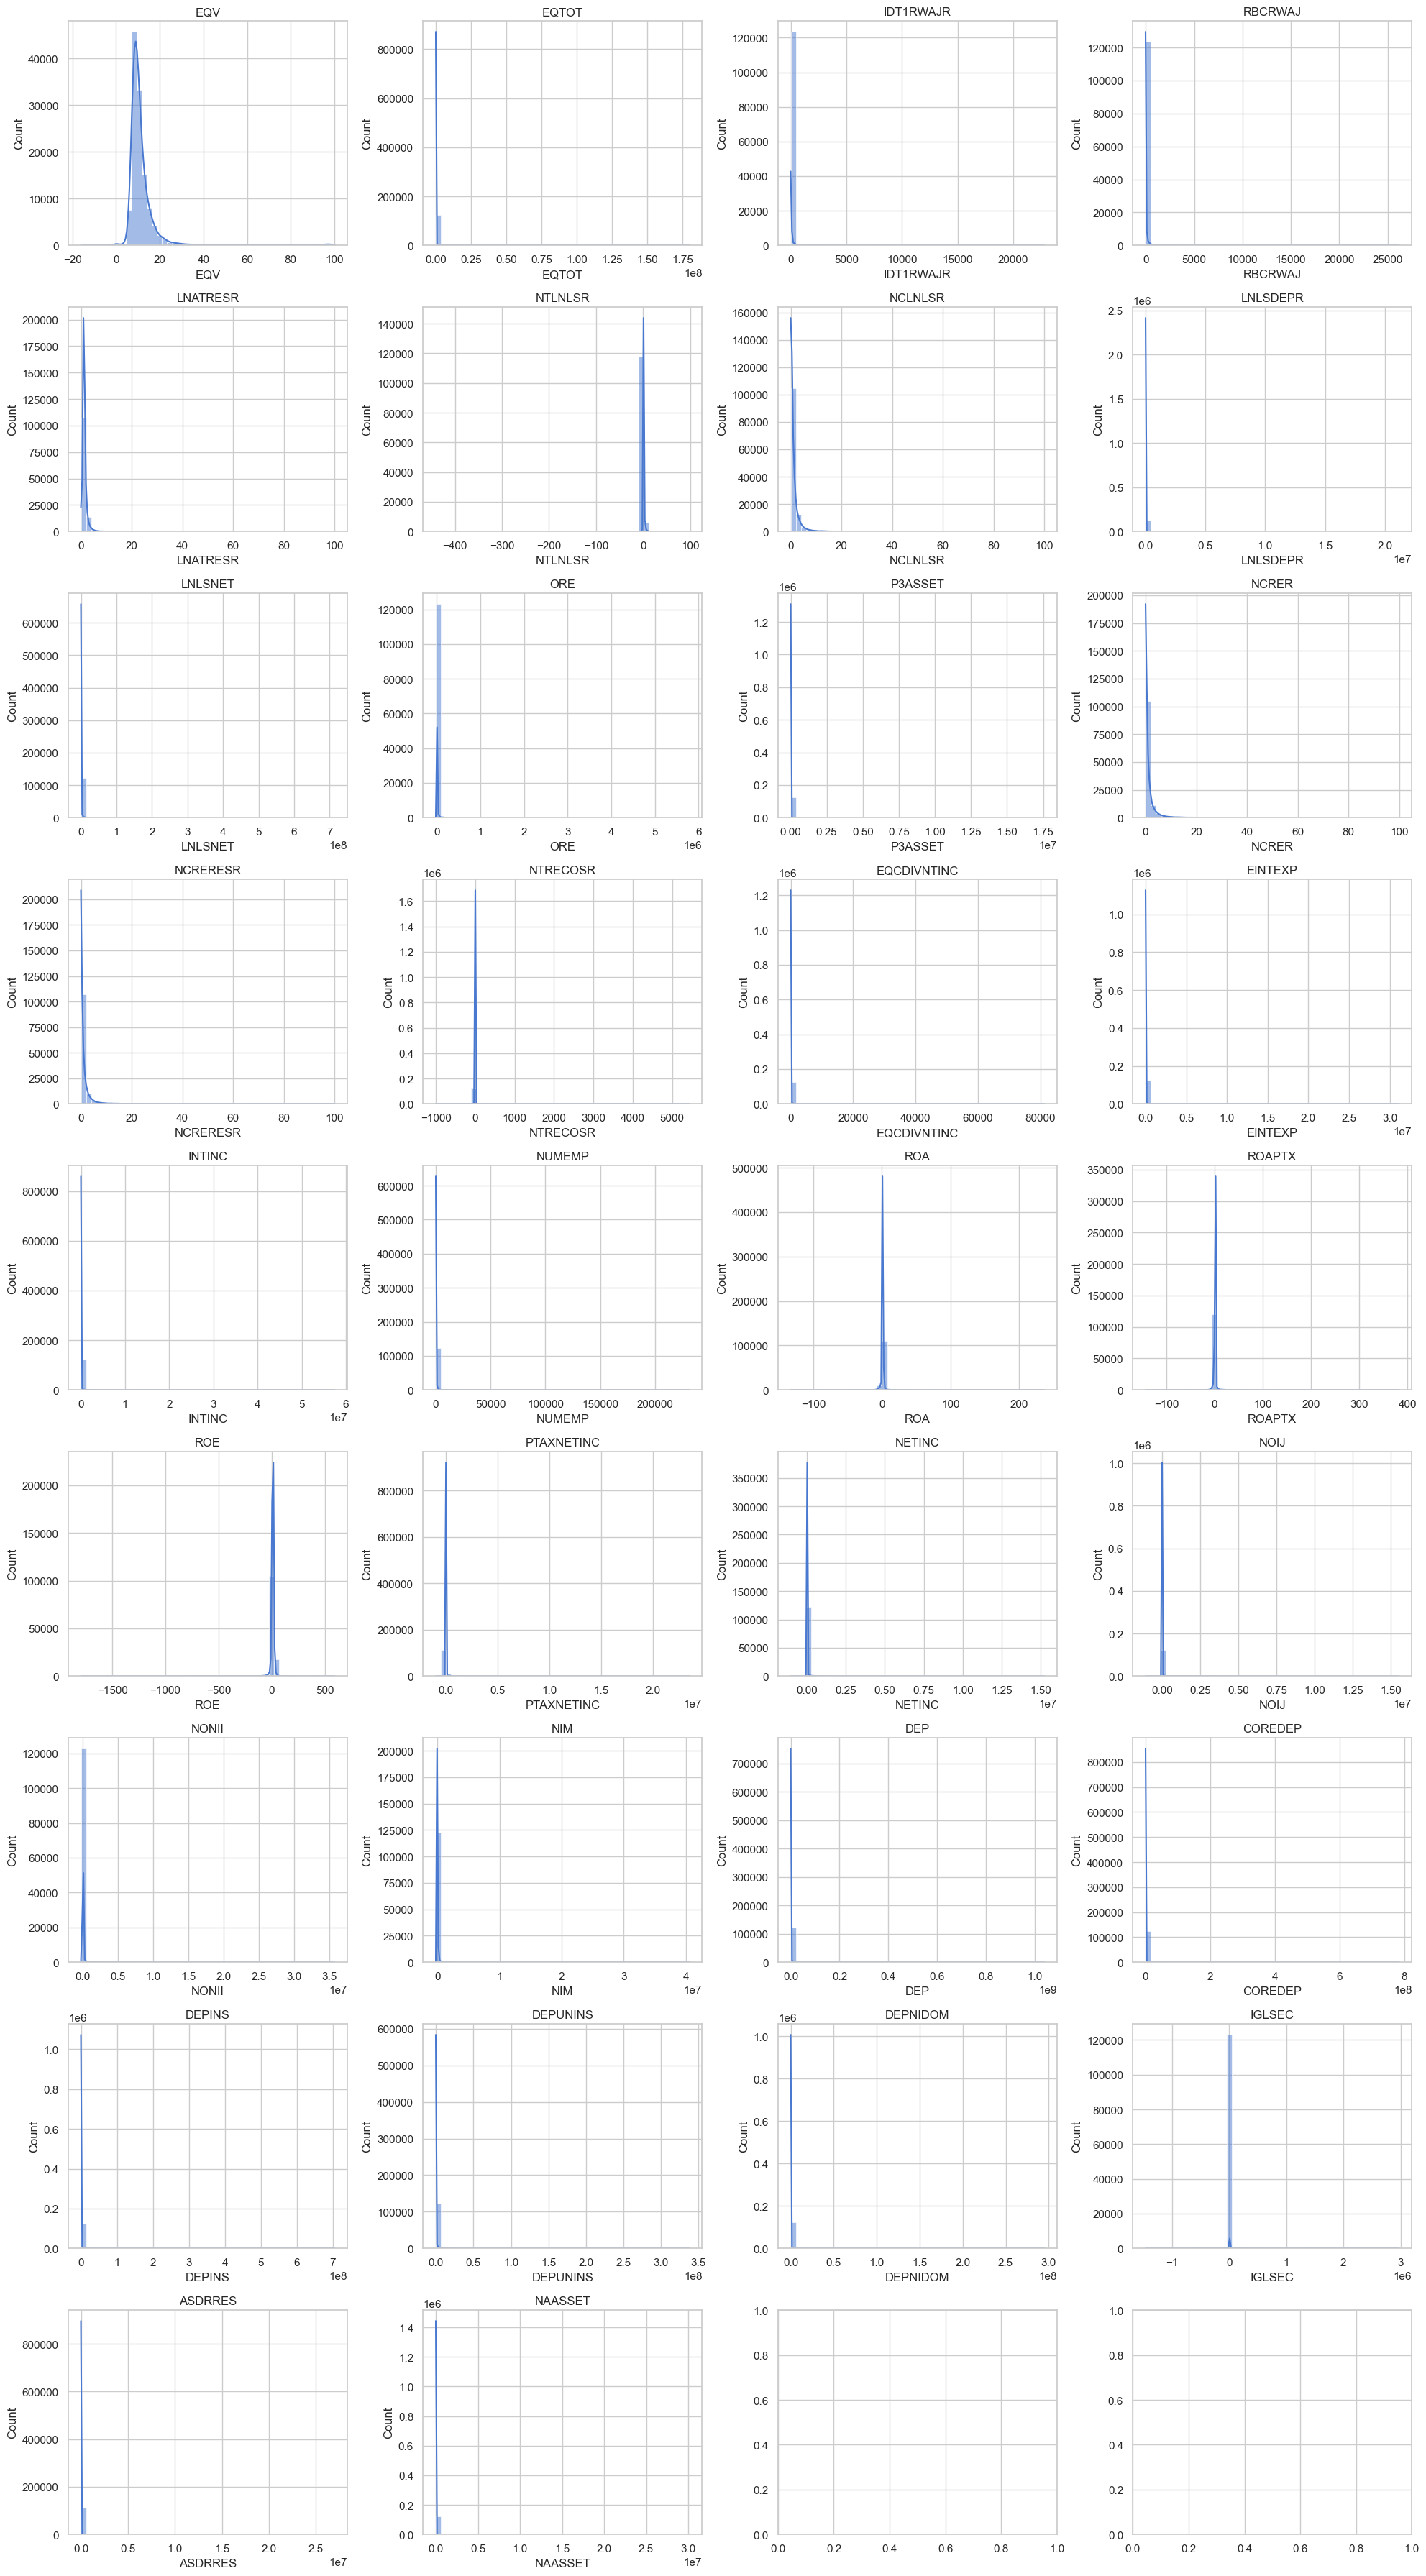

In [137]:
# Set the visual style
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Plot distributions
def plot_feature_distributions(df, features, bins=50):
    n_cols = 4
    n_rows = (len(features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if feature in df.columns:
            sns.histplot(df[feature].dropna(), kde=True, bins=bins, ax=axes[i])
            axes[i].set_title(feature)
        else:
            axes[i].axis("off")

    # # Turn off any unused subplots
    # for j in range(i + 1, len(axes)):
    #     axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Run the plot function
plot_feature_distributions(cleaned_merged_df, camel_core_features)

In [139]:
camels_ratios_df = pd.DataFrame({
    "cert": cleaned_merged_df["CERT"],
    "bank_name": cleaned_merged_df["NAMEFULL"],
    "quarter": cleaned_merged_df["QUARTER"],

    # Capital Adequacy (C)
    "equity_to_assets": cleaned_merged_df["EQV"] / cleaned_merged_df["NAASSET"],
    "tier1_rwa_ratio": cleaned_merged_df["IDT1RWAJR"],
    "total_equity_ratio": cleaned_merged_df["EQTOT"] / cleaned_merged_df["NAASSET"],
    "dividends_to_equity": cleaned_merged_df["EQCDIVNTINC"] / cleaned_merged_df["EQV"],

    # Asset Quality (A)
    "loan_loss_reserve_to_loans": cleaned_merged_df["LNATRESR"] / cleaned_merged_df["NTLNLSR"],
    "noncurrent_loans_to_loans": cleaned_merged_df["NCLNLSR"] / cleaned_merged_df["NTLNLSR"],
    "net_loans_to_assets": cleaned_merged_df["LNLSNET"] / cleaned_merged_df["NAASSET"],
    "loan_depreciation_to_loans": cleaned_merged_df["LNLSDEPR"] / cleaned_merged_df["NTLNLSR"],
    "ore_to_assets": cleaned_merged_df["ORE"] / cleaned_merged_df["NAASSET"],
    "assets_past_due_30_89_to_assets": cleaned_merged_df["P3ASSET"] / cleaned_merged_df["NAASSET"],
    "noncurrent_real_estate_to_assets": cleaned_merged_df["NCRER"] / cleaned_merged_df["NAASSET"],
    "noncurrent_re_to_loans": cleaned_merged_df["NCRERESR"] / cleaned_merged_df["NTLNLSR"],

    # Management (M)
    "efficiency_ratio_proxy": cleaned_merged_df["EINTEXP"] / cleaned_merged_df["INTINC"],
    "noninterest_income_to_assets": cleaned_merged_df["NONII"] / cleaned_merged_df["NAASSET"],
    "operating_income_to_assets": cleaned_merged_df["NOIJ"] / cleaned_merged_df["NAASSET"],
    "assets_per_employee": cleaned_merged_df["NAASSET"] / cleaned_merged_df["NUMEMP"],

    # Earnings (E)
    "return_on_assets": cleaned_merged_df["ROA"],
    "pretax_return_on_assets": cleaned_merged_df["ROAPTX"],
    "return_on_equity": cleaned_merged_df["ROE"],
    "net_interest_margin": cleaned_merged_df["NIM"],
    "net_income_to_assets": cleaned_merged_df["NETINC"] / cleaned_merged_df["NAASSET"],
    "pretax_income_to_assets": cleaned_merged_df["PTAXNETINC"] / cleaned_merged_df["NAASSET"],

    # Liquidity (L)
    "net_loans_to_total_deposits": cleaned_merged_df["LNLSNET"] / cleaned_merged_df["DEP"],
    "core_deposits_to_assets": cleaned_merged_df["COREDEP"] / cleaned_merged_df["NAASSET"],
    "uninsured_deposits_to_total_deposits": cleaned_merged_df["DEPUNINS"] / cleaned_merged_df["DEP"],
    "nonint_bearing_deposits_to_assets": cleaned_merged_df["DEPNIDOM"] / cleaned_merged_df["NAASSET"],
    "insured_deposits_to_total_deposits": cleaned_merged_df["DEPINS"] / cleaned_merged_df["DEP"],

    # Sensitivity to Market Risk (S)
    "securities_to_assets": cleaned_merged_df["IGLSEC"] / cleaned_merged_df["NAASSET"],
    "asset_sensitivity_proxy": cleaned_merged_df["ASDRRES"] / cleaned_merged_df["NAASSET"],
})

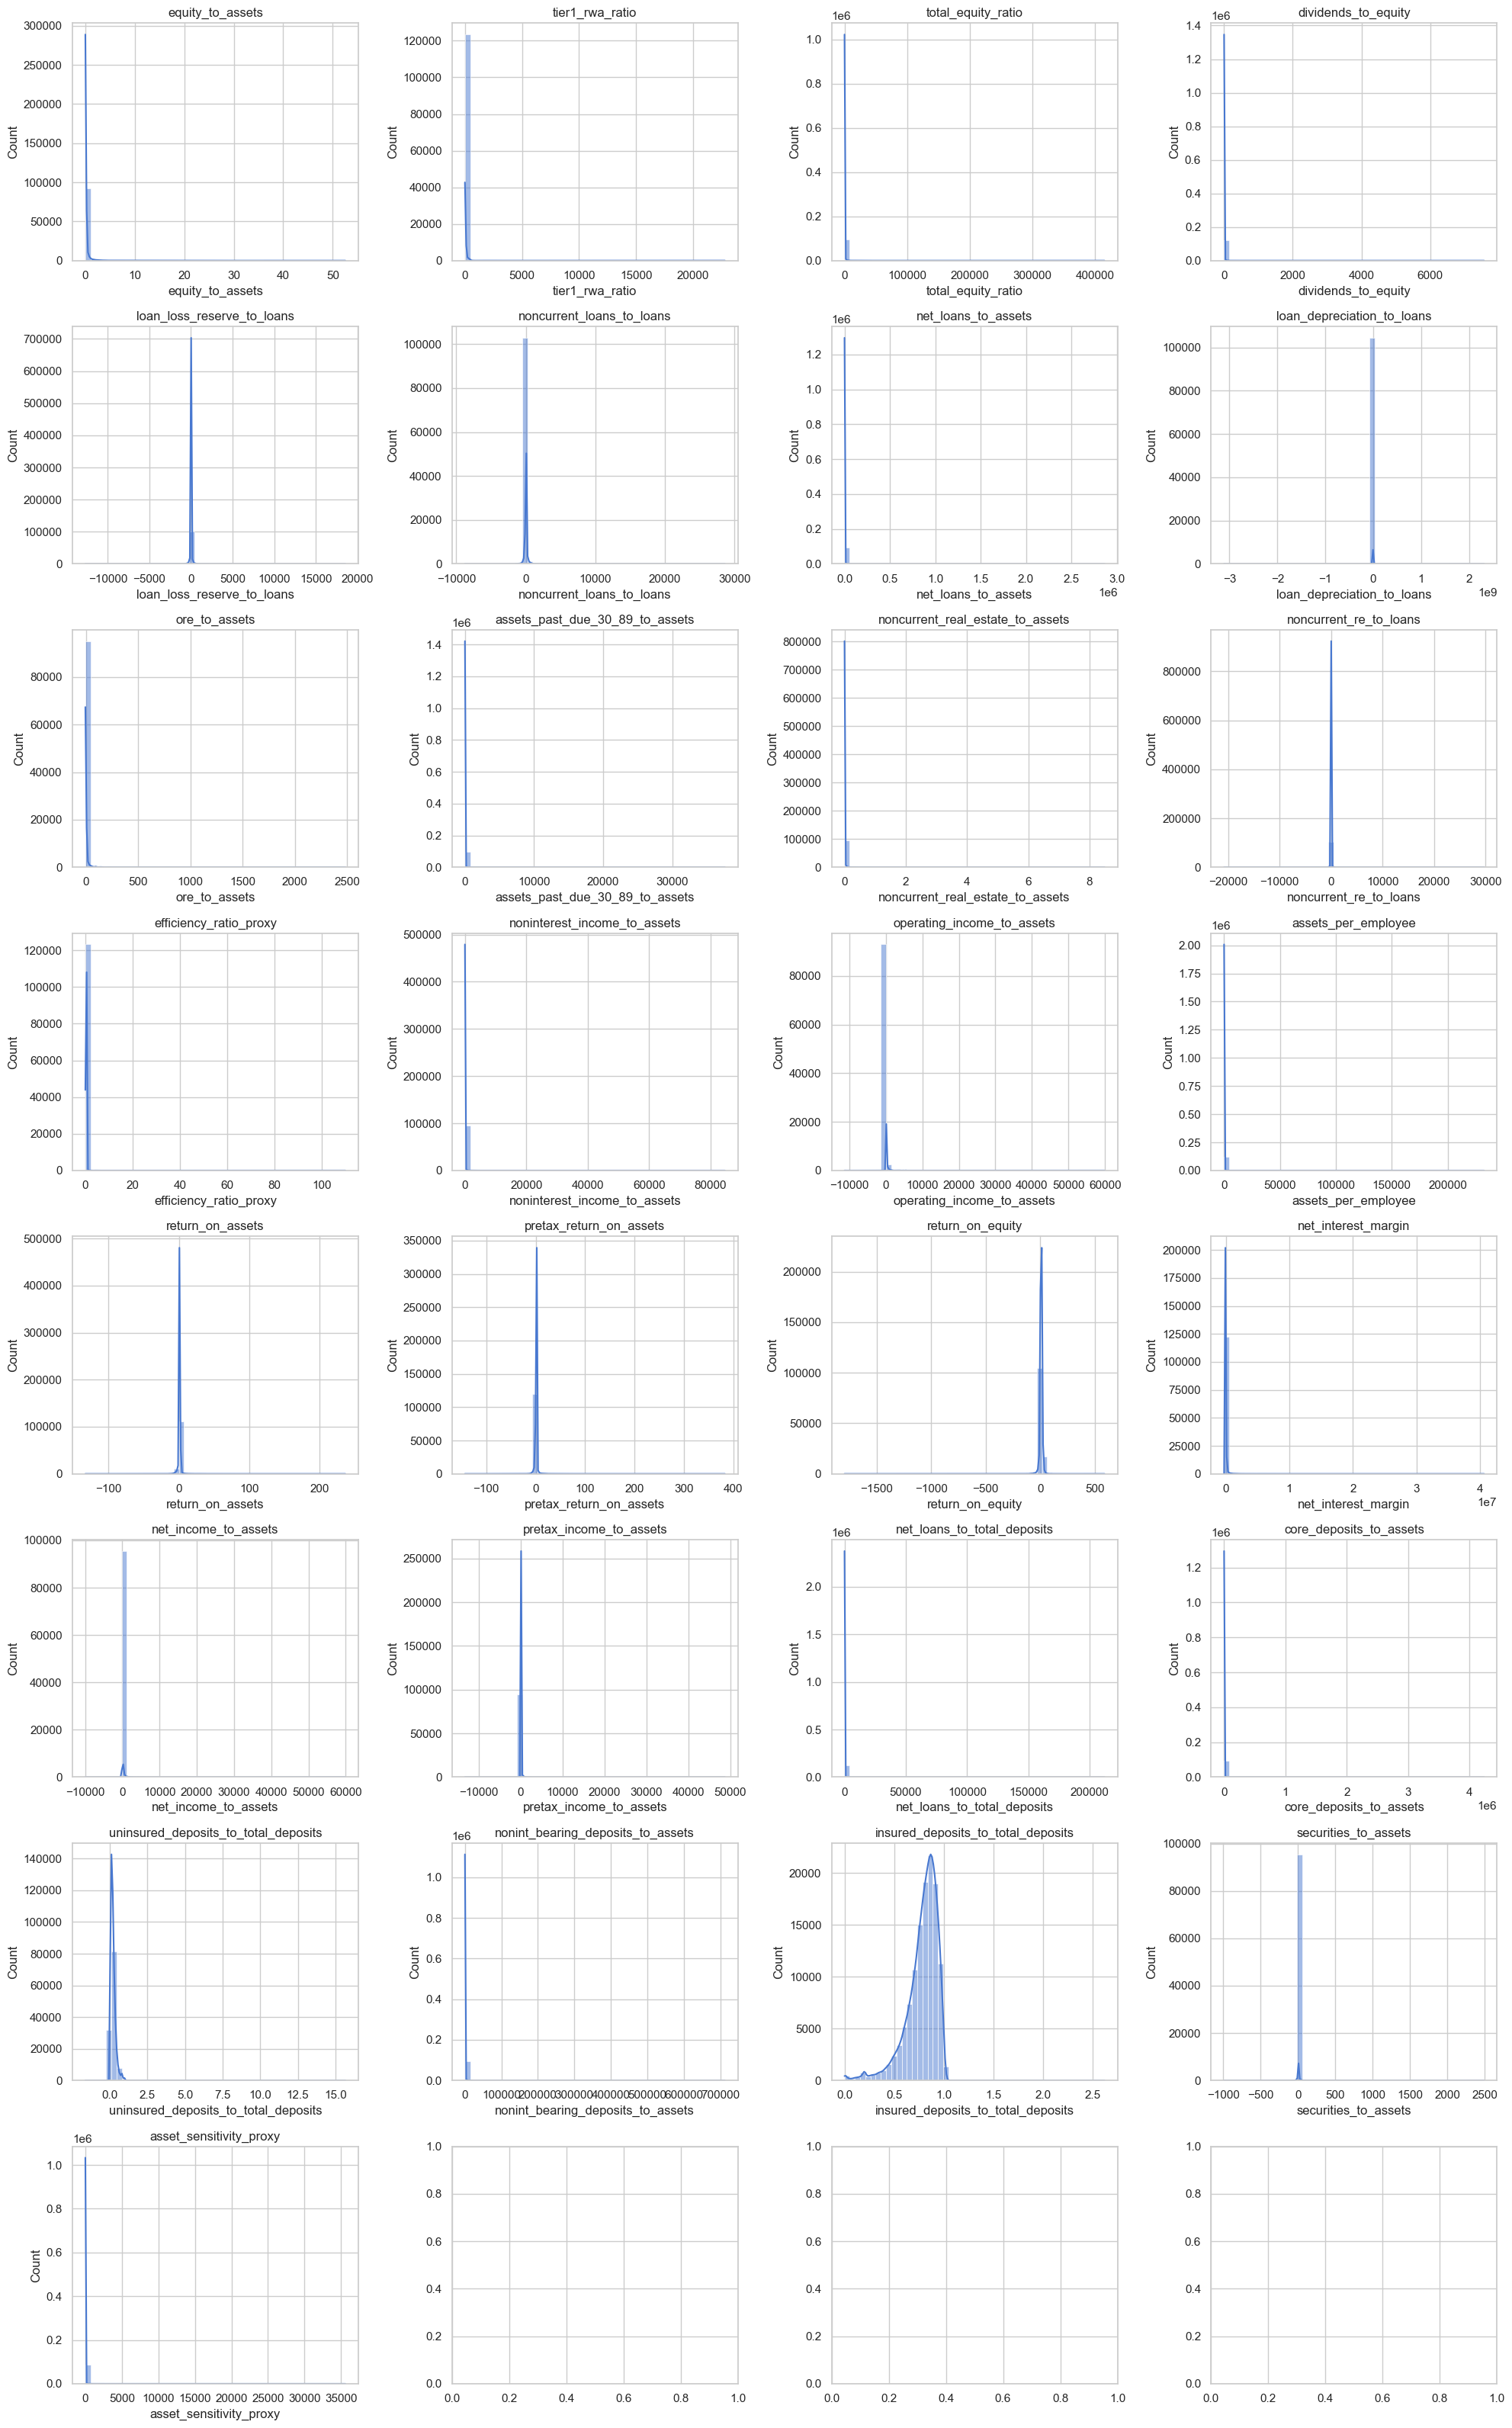

In [156]:
# Run the plot function
plot_feature_distributions(camels_ratios_df, camels_ratios_df.columns[3:])

In [145]:
camels_ratios_df = camels_ratios_df.replace([np.inf, -np.inf], np.nan)

In [149]:
camels_ratios_df.describe()

,cert,equity_to_assets,tier1_rwa_ratio,total_equity_ratio,dividends_to_equity,loan_loss_reserve_to_loans,noncurrent_loans_to_loans,net_loans_to_assets,loan_depreciation_to_loans,ore_to_assets,assets_past_due_30_89_to_assets,noncurrent_real_estate_to_assets,noncurrent_re_to_loans,efficiency_ratio_proxy,noninterest_income_to_assets,operating_income_to_assets,assets_per_employee,return_on_assets,pretax_return_on_assets,return_on_equity,net_interest_margin,net_income_to_assets,pretax_income_to_assets,net_loans_to_total_deposits,core_deposits_to_assets,uninsured_deposits_to_total_deposits,nonint_bearing_deposits_to_assets,insured_deposits_to_total_deposits,securities_to_assets,asset_sensitivity_proxy
count,123572.000000,95768.000000,123572.000000,95649.000000,123301.000000,104490.000000,104490.000000,9.576800e+04,1.044900e+05,95649.000000,95768.000000,95768.000000,104490.000000,123218.000000,95649.000000,95649.000000,122961.000000,123572.000000,123572.000000,123298.000000,1.233010e+05,95649.000000,95768.000000,122322.000000,9.574600e+04,122321.000000,95649.000000,122322.000000,95649.000000,86904.000000
mean,21393.905537,0.212554,20.799747,252.692049,4.532690,8.660421,6.670136,1.410010e+03,4.386418e+04,1.719225,12.296713,0.006658,6.169325,0.314731,17.507797,17.833123,33.087661,1.036886,1.416678,9.351583,2.524990e+04,18.119497,23.182310,10.209086,1.597600e+03,0.216092,296.221526,0.781777,0.379305,8.895566
std,16032.855228,1.090607,118.616902,2715.871969,38.736809,224.080304,181.268852,1.466344e+04,1.505136e+07,19.557263,182.618981,0.070698,227.385874,0.436692,493.624343,297.208733,1126.929525,3.336294,4.955920,14.550996,4.172713e+05,296.879088,334.128170,905.478407,2.244327e+04,0.166980,4410.550371,0.160387,17.121443,226.721774
min,9.000000,-0.004659,-18.955043,-2.219512,0.000000,-12703.362999,-8756.146012,2.631579e-01,-3.113049e+09,-4.285714,0.000000,0.000000,-20791.504516,-0.001847,-66.000000,-11298.250000,0.000000,-132.957028,-143.290493,-1794.570000,-2.720000e+05,-9926.000000,-13325.000000,-0.123031,-3.880089e+00,-1.616178,0.000000,0.000000,-989.000000,0.000000
25%,9433.000000,0.006025,10.987732,12.639594,0.000000,1.104244,0.059995,8.018423e+01,4.629542e+01,0.000000,0.588704,0.000227,0.000000,0.236989,0.400000,0.515444,0.340206,0.597571,0.789134,5.450000,1.069000e+03,0.536705,0.666332,0.650053,8.226659e+01,0.107533,11.648343,0.713723,0.000000,0.000000
50%,17880.000000,0.020382,13.736420,30.717391,1.469822,5.510654,2.515248,1.966187e+02,3.441239e+02,0.072848,1.614908,0.000891,1.134301,0.306363,1.174099,1.688383,6.241379,0.997083,1.327946,9.660000,2.572000e+03,1.724750,2.194652,0.802194,2.008355e+02,0.182418,32.451852,0.817114,0.000000,0.000000
75%,30337.000000,0.074515,18.857978,88.627119,5.896839,18.621570,8.576853,5.449044e+02,1.275825e+03,0.504392,4.564504,0.002677,6.573542,0.380615,3.750000,5.500000,20.162791,1.411283,1.834561,14.240000,6.375000e+03,5.586207,7.189019,0.930389,5.745770e+02,0.284621,100.223684,0.892351,0.009756,0.000000
max,91385.000000,52.550177,22798.245614,415196.000000,7571.369245,18554.620817,28635.576144,2.864768e+06,2.311990e+09,2481.000000,37623.000000,8.486419,29734.720251,110.000000,84667.000000,59857.000000,232600.000000,236.547212,383.076305,589.990000,4.060700e+07,59872.666667,48666.500000,211937.000000,4.237045e+06,15.655395,712486.000000,2.616178,2488.438596,35580.000000


In [153]:
def clean_camels_ratios(df):
    df = df.copy()

    # Clip extreme outliers (winsorization)
    clip_limits = {
        'equity_to_assets': (-1, 1),
        'tier1_rwa_ratio': (0, 100),
        'total_equity_ratio': (0, 1000),
        'dividends_to_equity': (0, 20),
        'loan_loss_reserve_to_loans': (0, 100),
        'noncurrent_loans_to_loans': (0, 100),
        'net_loans_to_assets': (0, 1),
        'loan_depreciation_to_loans': (0, 1000),
        'ore_to_assets': (0, 1),
        'assets_past_due_30_89_to_assets': (0, 1),
        'noncurrent_real_estate_to_assets': (0, 1),
        'noncurrent_re_to_loans': (0, 1),
        'efficiency_ratio_proxy': (0, 2),
        'noninterest_income_to_assets': (-1, 1),
        'operating_income_to_assets': (-1, 1),
        'assets_per_employee': (0, np.nanpercentile(df['assets_per_employee'].dropna(), 99)),
        'return_on_assets': (-1, 1),
        'pretax_return_on_assets': (-1, 1),
        'return_on_equity': (-5, 5),
        'net_interest_margin': (0, 1),
        'net_income_to_assets': (-1, 1),
        'pretax_income_to_assets': (-1, 1),
        'net_loans_to_total_deposits': (0, 1.5),
        'core_deposits_to_assets': (0, 1),
        'uninsured_deposits_to_total_deposits': (0, 1),
        'nonint_bearing_deposits_to_assets': (0, 1),
        'insured_deposits_to_total_deposits': (0, 1),
        'securities_to_assets': (0, 1),
        'asset_sensitivity_proxy': (0, np.nanpercentile(df['asset_sensitivity_proxy'].dropna(), 99)),
    }

    for col, (low, high) in clip_limits.items():
        df[col] = df[col].clip(lower=low, upper=high)

    # Optional: drop rows with too many NaNs
    df = df.dropna(thresh=int(df.shape[1] * 0.5))  # keep rows with at least 80% non-NaN

    return df

In [154]:
cleaned_camels_ratios_df = clean_camels_ratios(camels_ratios_df)

In [155]:
cleaned_camels_ratios_df.describe()

,cert,equity_to_assets,tier1_rwa_ratio,total_equity_ratio,dividends_to_equity,loan_loss_reserve_to_loans,noncurrent_loans_to_loans,net_loans_to_assets,loan_depreciation_to_loans,ore_to_assets,assets_past_due_30_89_to_assets,noncurrent_real_estate_to_assets,noncurrent_re_to_loans,efficiency_ratio_proxy,noninterest_income_to_assets,operating_income_to_assets,assets_per_employee,return_on_assets,pretax_return_on_assets,return_on_equity,net_interest_margin,net_income_to_assets,pretax_income_to_assets,net_loans_to_total_deposits,core_deposits_to_assets,uninsured_deposits_to_total_deposits,nonint_bearing_deposits_to_assets,insured_deposits_to_total_deposits,securities_to_assets,asset_sensitivity_proxy
count,111184.000000,95746.000000,111184.000000,95649.000000,111087.000000,104488.000000,104488.000000,95746.000000,104488.000000,95649.000000,95746.000000,95746.000000,104488.000000,111074.000000,95649.000000,95649.000000,111054.000000,111184.000000,111184.000000,111084.000000,111087.000000,95649.000000,95746.000000,111181.000000,95746.000000,111181.000000,95649.000000,111181.000000,95649.000000,86882.000000
mean,19662.834590,0.106642,16.008847,113.416625,3.822163,17.624960,10.272987,0.999881,464.416440,0.287161,0.788594,0.005992,0.555920,0.313422,0.725969,0.732301,22.451113,0.746348,0.801064,4.196705,0.999649,0.741643,0.763299,0.794996,0.998747,0.207930,0.981147,0.790164,0.067841,1.887417
std,14745.737758,0.225664,8.789251,219.826878,4.842589,27.795458,20.934198,0.007934,413.318296,0.377411,0.328576,0.038562,0.481754,0.105285,0.353168,0.445844,43.385355,0.437724,0.444946,2.252350,0.018734,0.435134,0.445111,0.220467,0.033720,0.139385,0.123712,0.144083,0.205171,11.240292
min,9.000000,-0.004659,0.000000,0.000000,0.000000,0.000000,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-5.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8870.000000,0.006031,10.934183,12.639594,0.000000,1.104253,0.060213,1.000000,46.304924,0.000000,0.588987,0.000228,0.000000,0.241051,0.400000,0.515444,1.600000,0.644244,0.850969,5.000000,1.000000,0.536705,0.666667,0.660579,1.000000,0.108531,1.000000,0.722995,0.000000,0.000000
50%,16701.000000,0.020396,13.448228,30.717391,2.086071,5.510857,2.515361,1.000000,344.158304,0.072848,1.000000,0.000892,1.000000,0.307500,1.000000,1.000000,8.020055,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.805502,1.000000,0.180375,1.000000,0.819454,0.000000,0.000000
75%,28790.000000,0.074537,17.896603,88.627119,6.204880,18.621933,8.576883,1.000000,1000.000000,0.504392,1.000000,0.002678,1.000000,0.379761,1.000000,1.000000,22.657773,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.930155,1.000000,0.275994,1.000000,0.891535,0.009756,0.000000
max,91363.000000,1.000000,100.000000,1000.000000,20.000000,100.000000,100.000000,1.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,282.695714,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,94.654656


In [122]:
label_df = pd.read_csv("./data_csv/failed_bank-data_2008_2010.csv")
label_df["LABEL"] = 1
label_df = label_df[["CERT","LABEL"]]

In [123]:
label_df

,CERT,LABEL
0,19040,1
1,23306,1
2,34578,1
3,35065,1
4,58052,1
...,...,...
330,29730,1
331,12736,1
332,33901,1
333,1971,1


In [99]:
def parse_quarter_to_date(quarter_str:str) -> pd.Timestamp:
    year,qtr = quarter_str.split("_")
    quarter_month_map = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}
    month = quarter_month_map[qtr]
    return pd.to_datetime(f"{year}-{month}-01")

In [100]:
camels_ratios_df["date"] = camels_ratios_df["quarter"].apply(parse_quarter_to_date)

In [101]:
def engineer_lag_features_optimized(df: pd.DataFrame, features: list, max_lag: int = 8,
                                    bank_id_col: str = "cert") -> pd.DataFrame:
    """
    Add lag features for specified CAMELS variables.
    
    """
    df = df.copy()
    
    
    df = df.sort_values(by=[bank_id_col, "date"])

    lag_dfs = [df]

    # Generate lag features for each specified variable
    for lag in range(1, max_lag + 1):
        lagged = (
            df.groupby(bank_id_col)[features]
              .shift(lag)
              .add_suffix(f"_lag{lag}")
        )
        lag_dfs.append(lagged)

    # Concatenate all in one go for performance
    df_with_lags = pd.concat(lag_dfs, axis=1)

    return df_with_lags



In [103]:
camels_ratios_df.columns[3:-1]

Index(['equity_to_assets', 'tier1_rwa_ratio', 'total_equity_ratio',
       'dividends_to_equity', 'loan_loss_reserve_to_loans',
       'noncurrent_loans_to_loans', 'net_loans_to_assets',
       'loan_depreciation_to_loans', 'ore_to_assets',
       'assets_past_due_30_89_to_assets', 'noncurrent_real_estate_to_assets',
       'noncurrent_re_to_loans', 'efficiency_ratio_proxy',
       'noninterest_income_to_assets', 'operating_income_to_assets',
       'assets_per_employee', 'return_on_assets', 'pretax_return_on_assets',
       'return_on_equity', 'net_interest_margin', 'net_income_to_assets',
       'pretax_income_to_assets', 'net_loans_to_total_deposits',
       'core_deposits_to_assets', 'uninsured_deposits_to_total_deposits',
       'nonint_bearing_deposits_to_assets',
       'insured_deposits_to_total_deposits', 'securities_to_assets',
       'asset_sensitivity_proxy'],
      dtype='object')

In [104]:
engineered_df = engineer_lag_features_optimized(camels_ratios_df,features = camels_ratios_df.columns[3:-1])

In [105]:
engineered_df[engineered_df["quarter"] == '2006_Q4']

,cert,bank_name,quarter,equity_to_assets,tier1_rwa_ratio,total_equity_ratio,dividends_to_equity,loan_loss_reserve_to_loans,noncurrent_loans_to_loans,net_loans_to_assets,...,net_interest_margin_lag8,net_income_to_assets_lag8,pretax_income_to_assets_lag8,net_loans_to_total_deposits_lag8,core_deposits_to_assets_lag8,uninsured_deposits_to_total_deposits_lag8,nonint_bearing_deposits_to_assets_lag8,insured_deposits_to_total_deposits_lag8,securities_to_assets_lag8,asset_sensitivity_proxy_lag8
2,35,AUBURNBANK,2006_Q4,0.111326,14.444217,703.875000,12.427506,31.591146,0.562454,3903.444444,...,15.0,2.799822,3.817616,0.569863,323.827402,0.434423,58.014235,0.565577,0.016014,NaN
3,39,ROBERTSON BANKING COMPANY,2006_Q4,0.018809,14.548683,41.089720,11.021083,5.205299,1.081800,299.153271,...,15.0,0.184779,0.214418,0.929761,19.241124,0.125737,2.583513,0.874263,NaN,NaN
4,41,PHENIX-GIRARD BANK,2006_Q4,0.080263,21.058015,121.901961,3.625643,2.832083,0.969891,465.633987,...,15.0,3.190073,3.181598,0.612607,97.375303,0.342715,25.814770,0.657285,0.196126,NaN
5,46,MERCHANTS BANK OF ALABAMA,2006_Q4,0.005842,10.987000,11.935128,NaN,12.900210,8.117422,110.465148,...,15.0,1.944251,2.681185,0.896440,188.860627,0.216733,39.167247,0.783267,NaN,NaN
6,47,TRADERS & FARMERS BANK,2006_Q4,0.009412,16.030619,33.603806,3.385485,10.529637,5.727639,151.097751,...,15.0,1.307592,1.955034,0.598794,60.665037,0.200000,11.123167,0.800000,0.028022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8774,90528,MONTROSEBANK,2006_Q4,0.015214,10.152121,25.065630,5.018235,13.250149,11.234065,225.281520,...,15.0,121.000000,121.111111,0.906150,5247.166667,0.176825,1880.611111,0.823175,-0.111111,NaN
8776,90579,HERITAGE BANK,2006_Q4,0.001928,9.626367,8.385686,NaN,2.889005,2.965366,75.631168,...,15.0,0.434085,0.542199,0.832191,62.481283,0.316858,14.144153,0.683142,-0.007440,NaN
8777,90582,CASTLE ROCK BANK,2006_Q4,0.020517,9.274001,22.474719,12.531958,18.783663,7.623584,240.339888,...,15.0,0.401929,0.601286,0.902453,101.038585,0.031515,25.234727,0.968485,NaN,NaN
8779,91005,5 STAR BANK,2006_Q4,3.341680,34.490712,5538.500000,NaN,2.781270,0.523959,11261.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [108]:
engineered_df.describe()

,cert,equity_to_assets,tier1_rwa_ratio,total_equity_ratio,dividends_to_equity,loan_loss_reserve_to_loans,noncurrent_loans_to_loans,net_loans_to_assets,loan_depreciation_to_loans,ore_to_assets,assets_past_due_30_89_to_assets,noncurrent_real_estate_to_assets,noncurrent_re_to_loans,efficiency_ratio_proxy,noninterest_income_to_assets,operating_income_to_assets,assets_per_employee,return_on_assets,pretax_return_on_assets,return_on_equity,net_interest_margin,net_income_to_assets,pretax_income_to_assets,net_loans_to_total_deposits,core_deposits_to_assets,uninsured_deposits_to_total_deposits,nonint_bearing_deposits_to_assets,insured_deposits_to_total_deposits,securities_to_assets,asset_sensitivity_proxy,date,equity_to_assets_lag1,tier1_rwa_ratio_lag1,total_equity_ratio_lag1,dividends_to_equity_lag1,loan_loss_reserve_to_loans_lag1,noncurrent_loans_to_loans_lag1,net_loans_to_assets_lag1,loan_depreciation_to_loans_lag1,ore_to_assets_lag1,assets_past_due_30_89_to_assets_lag1,noncurrent_real_estate_to_assets_lag1,noncurrent_re_to_loans_lag1,efficiency_ratio_proxy_lag1,noninterest_income_to_assets_lag1,operating_income_to_assets_lag1,assets_per_employee_lag1,return_on_assets_lag1,pretax_return_on_assets_lag1,return_on_equity_lag1,net_interest_margin_lag1,net_income_to_assets_lag1,pretax_income_to_assets_lag1,net_loans_to_total_deposits_lag1,core_deposits_to_assets_lag1,uninsured_deposits_to_total_deposits_lag1,nonint_bearing_deposits_to_assets_lag1,insured_deposits_to_total_deposits_lag1,securities_to_assets_lag1,asset_sensitivity_proxy_lag1,equity_to_assets_lag2,tier1_rwa_ratio_lag2,total_equity_ratio_lag2,dividends_to_equity_lag2,loan_loss_reserve_to_loans_lag2,noncurrent_loans_to_loans_lag2,net_loans_to_assets_lag2,loan_depreciation_to_loans_lag2,ore_to_assets_lag2,assets_past_due_30_89_to_assets_lag2,noncurrent_real_estate_to_assets_lag2,noncurrent_re_to_loans_lag2,efficiency_ratio_proxy_lag2,noninterest_income_to_assets_lag2,operating_income_to_assets_lag2,assets_per_employee_lag2,return_on_assets_lag2,pretax_return_on_assets_lag2,return_on_equity_lag2,net_interest_margin_lag2,net_income_to_assets_lag2,pretax_income_to_assets_lag2,net_loans_to_total_deposits_lag2,core_deposits_to_assets_lag2,uninsured_deposits_to_total_deposits_lag2,nonint_bearing_deposits_to_assets_lag2,insured_deposits_to_total_deposits_lag2,securities_to_assets_lag2,asset_sensitivity_proxy_lag2,equity_to_assets_lag3,tier1_rwa_ratio_lag3,total_equity_ratio_lag3,dividends_to_equity_lag3,loan_loss_reserve_to_loans_lag3,noncurrent_loans_to_loans_lag3,net_loans_to_assets_lag3,loan_depreciation_to_loans_lag3,ore_to_assets_lag3,assets_past_due_30_89_to_assets_lag3,noncurrent_real_estate_to_assets_lag3,noncurrent_re_to_loans_lag3,efficiency_ratio_proxy_lag3,noninterest_income_to_assets_lag3,operating_income_to_assets_lag3,assets_per_employee_lag3,return_on_assets_lag3,pretax_return_on_assets_lag3,return_on_equity_lag3,net_interest_margin_lag3,net_income_to_assets_lag3,pretax_income_to_assets_lag3,net_loans_to_total_deposits_lag3,core_deposits_to_assets_lag3,uninsured_deposits_to_total_deposits_lag3,nonint_bearing_deposits_to_assets_lag3,insured_deposits_to_total_deposits_lag3,securities_to_assets_lag3,asset_sensitivity_proxy_lag3,equity_to_assets_lag4,tier1_rwa_ratio_lag4,total_equity_ratio_lag4,dividends_to_equity_lag4,loan_loss_reserve_to_loans_lag4,noncurrent_loans_to_loans_lag4,net_loans_to_assets_lag4,loan_depreciation_to_loans_lag4,ore_to_assets_lag4,assets_past_due_30_89_to_assets_lag4,noncurrent_real_estate_to_assets_lag4,noncurrent_re_to_loans_lag4,efficiency_ratio_proxy_lag4,noninterest_income_to_assets_lag4,operating_income_to_assets_lag4,assets_per_employee_lag4,return_on_assets_lag4,pretax_return_on_assets_lag4,return_on_equity_lag4,net_interest_margin_lag4,net_income_to_assets_lag4,pretax_income_to_assets_lag4,net_loans_to_total_deposits_lag4,core_deposits_to_assets_lag4,uninsured_deposits_to_total_deposits_lag4,nonint_bearing_deposits_to_assets_lag4,insured_d